# 교차검증 (Cross-Validation)
* Train Data: 모델을 학습하는데 사용하는 데이터
    * 모델이 알고있는 학습할 데이터
* Valid Data: 학습한 모델의 성능을 검증하는 데이터
    * 모델이 모르는 학습하지 않을 데이터, 모델 검증에 사용하는 데이터
* Test Data: 학습한 모델로 예측할 데이터
    * 모델이 모르는 예측할 데이터

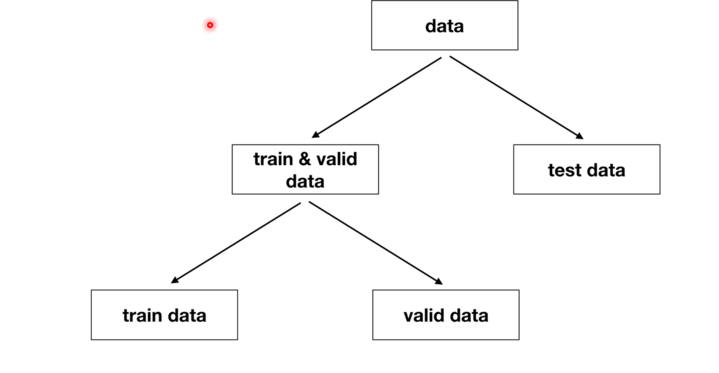

In [14]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [15]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [20]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [17]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [18]:
print(sub_input.shape, val_input.shape)     # 훈련세트 5197가 4157으로 줄고 검증세트 1040가 만들어졌다. 

(4157, 3) (1040, 3)


In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


## 교차 검증
* 훈련세트와 테스트세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 통계적 평가 방법
* 교차 검증
    * 데이터를 여러번 반복해서 나누고 여러 모델을 학습
* 분류기의 일반화 성능을 측정할 때 k-겹 교차검증보다 더 안정적 계층별 k-겹 교차검증을 사용하는 것이 좋다. 

In [22]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)  # fit_time, score_time, test_score 확인

{'fit_time': array([0.00903559, 0.00591612, 0.00701213, 0.00699878, 0.00602078]), 'score_time': array([0.00200295, 0.00103855, 0.00095129, 0.00102949, 0.00098562]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [23]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [24]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [26]:
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state=42)    # n_splits 매개변수는 몇(k)폴드 교차검증할지 결정한다.
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


## 하이퍼파라미터 튜닝

In [31]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [32]:
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = -1)

In [33]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [34]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [35]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [36]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [38]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [39]:
params = {'min_imputiry+decrease': np.arange(0.0001, 0.001, 0.0001), 
         'max_depth': range(5,20,1),
         'min_samples_split': range(2,100,10)}

In [43]:
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = 1)
gs.fit(train_input, train_target)

ValueError: Invalid parameter 'min_imputiry+decrease' for estimator DecisionTreeClassifier(max_depth=5, random_state=42). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

## 랜덤 서치